# Using Complex numbers as vectors

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Bermuda Triangle

In [24]:
miami_fl = complex(-80.191788, 25.761681)
san_juan = complex(-66.105721, 18.466333)
hamilton = complex(-64.78303, 32.2949)

In [25]:
triangle = (miami_fl, san_juan, hamilton)
names = ['Miami', 'San Juan', 'Hamilton']

In [26]:
plt.style.use('seaborn')

def draw(
        vertices, 
        xlim=(-90, 20), 
        ylim=(-20, 50), 
        fill='cornflowerblue', 
        stroke='royalblue', 
        letters=False,
        tags=[],
        centre=False,
        centre_point=0
        ):
    
    fig, ax = plt.subplots()

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    ax.spines.left.set_position('zero')
    ax.spines.bottom.set_position('zero')

    ax.set_aspect('equal', adjustable='box')

    x = [vertex.real for vertex in vertices]
    y = [vertex.imag for vertex in vertices]

    ax.plot(x, y, 'o', color=stroke)
    ax.add_patch(
                plt.Polygon(
                            list(zip(x, y)),
                            facecolor=fill,
                            edgecolor=stroke,
                            alpha=0.5,
                            lw=2
                        )
                )
    
    if letters:
        for i, vertex in enumerate(vertices):
            ax.text(
                    vertex.real + 1,
                    vertex.imag + 1,
                    tags[i],
                    color=stroke,
                    fontsize=16
                    )
    
    if centre:
        for vertex in vertices:
            con = patches.ConnectionPatch(
                                        (vertex.real, vertex.imag), 
                                        (centre_point.real, centre_point.imag),
                                        "data",
                                        "data",
                                        arrowstyle='->'
                                        )
            ax.add_artist(con)
    
    plt.tight_layout()

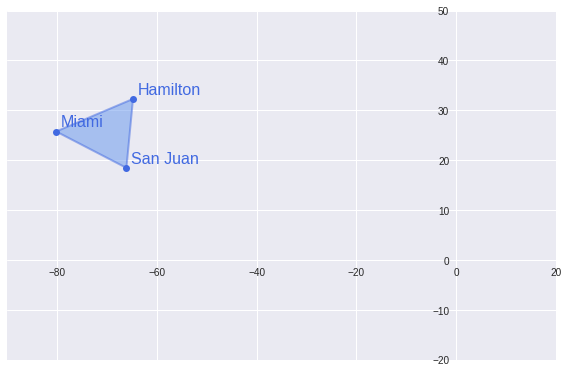

In [27]:
draw(triangle, letters=True, tags=names)

## Magnitude

$|z| = \sqrt{Re(z)^2 + Im(z)^2}$

In [28]:
abs(3 + 2j)

3.605551275463989

In [29]:
from math import sqrt

sqrt((3 ** 2) + (2 ** 2))

3.605551275463989

## Distance between points

In [30]:
geometric_centre = sum([miami_fl, san_juan, hamilton]) / 3

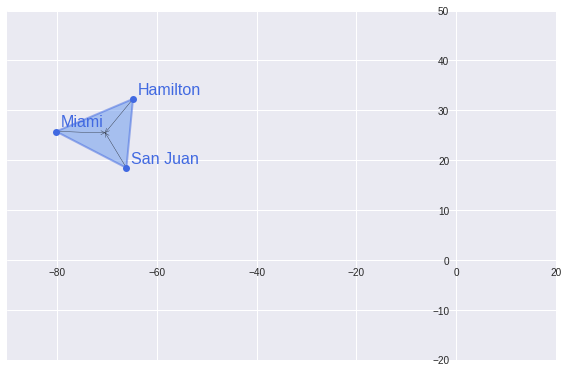

In [31]:
draw(
    triangle, 
    letters=True, 
    tags=names, 
    centre=True, 
    centre_point=geometric_centre
    )

In [32]:
# vectors from points to centre
v1 = geometric_centre - miami_fl
v2 = geometric_centre - san_juan
v3 = geometric_centre - hamilton

In [33]:
abs(v1), abs(v2), abs(v3)

(9.83488994681275, 8.226809506084367, 8.784732429678444)

## Translating

In [34]:
offset = -geometric_centre
centred_triangle = [vertex + offset for vertex in triangle]

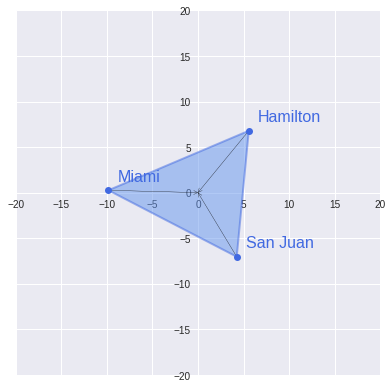

In [35]:
draw(
    centred_triangle,
    xlim=(-20, 20),
    ylim=(-20, 20),
    letters=True,
    tags=names,
    centre=True
    )

## Flipping

In [36]:
flipped_horizontally = [complex(-v.real, v.imag) for v in centred_triangle]
flipped_vertically = [v.conjugate() for v in centred_triangle]
flipped_in_both = [-v for v in centred_triangle]

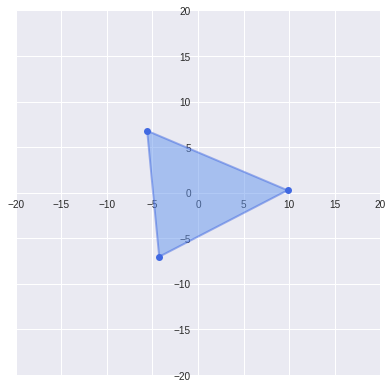

In [38]:
draw(flipped_horizontally, xlim=(-20, 20), ylim=(-20, 20))

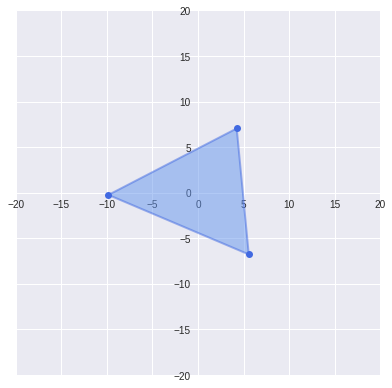

In [39]:
draw(flipped_vertically, xlim=(-20, 20), ylim=(-20, 20))

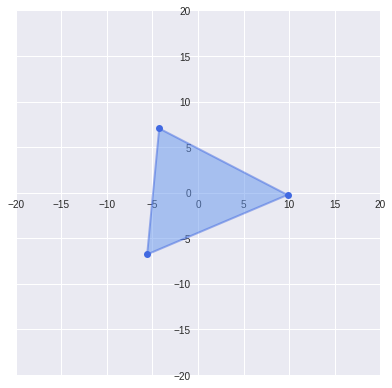

In [40]:
draw(flipped_in_both, xlim=(-20, 20), ylim=(-20, 20))

## Scaling

In [41]:
scaled_triangle = [1.5*v for v in centred_triangle]

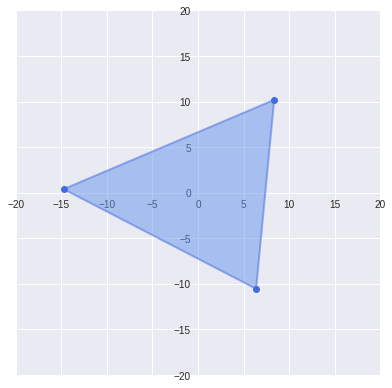

In [43]:
draw(scaled_triangle, xlim=(-20, 20), ylim=(-20, 20))

## Rotating

In [44]:
def rotate(z: complex, degrees:float) -> complex:
    return z * (1j ** (degrees / 90))

In [45]:
rotated_90 = [rotate(v, 90) for v in centred_triangle]

In [47]:
draw(rotated_90, xlim=(-20, 20), ylim=(-20, 20))